Image dimensions: (1024, 1280, 4)
<class 'float'>


<function matplotlib.pyplot.show(close=None, block=None)>

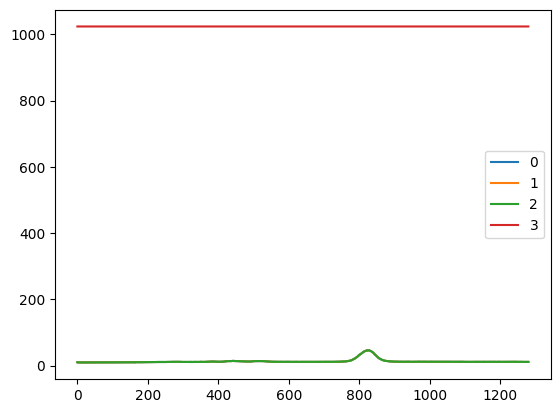

In [79]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

img = mpimg.imread(r"Z:\Beam Profiles with Camera\02-09_Input\image_3.png")

print('Image dimensions:', img.shape)

print(type(float(img.shape[2])))
for i in range(img.shape[2]):
    plt.plot(img[:,:,i].sum(axis=0), label=i)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

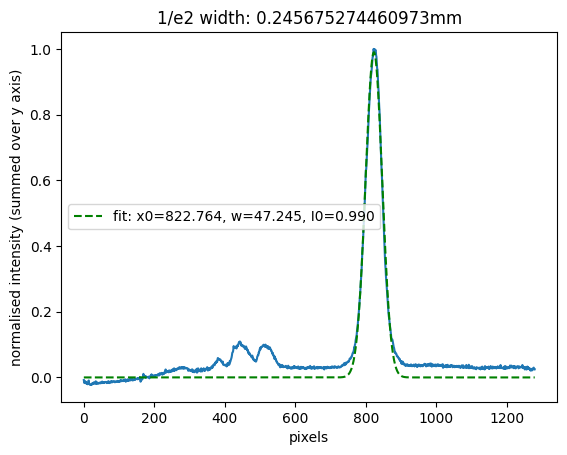

In [80]:
from scipy.optimize import curve_fit

intensity = img[:,:,2].sum(axis=0)
pixel = np.arange(intensity.shape[0])
noise = np.average(intensity[0:300])
intensity = intensity-noise
intensity = intensity/np.max(intensity)

plt.plot(pixel,intensity)

def Gaussian(x,x0,w,I0):
    return I0*np.exp( -2*((x-x0)**2)/(w**2) )

popt, pcov = curve_fit(Gaussian, pixel, intensity, bounds=([700,0,0.99],[900,100,1]))

plt.plot(pixel, Gaussian(pixel, *popt), 'g--',
         label='fit: x0=%5.3f, w=%5.3f, I0=%5.3f' % tuple(popt))
plt.legend()
plt.xlabel('pixels')
plt.ylabel('normalised intensity (summed over y axis)')
pixel_length = 5.2e-3 # mm
w_e2 = pixel_length*popt[1]
plt.title('1/e2 width: {}mm'.format(w_e2))
plt.show



### Calculating Divergence from fiber output through 1 AOM to input of 2nd AOM
##### Fiber Input (redone above)

Image dimensions: (1024, 1280, 4)


<function matplotlib.pyplot.show(close=None, block=None)>

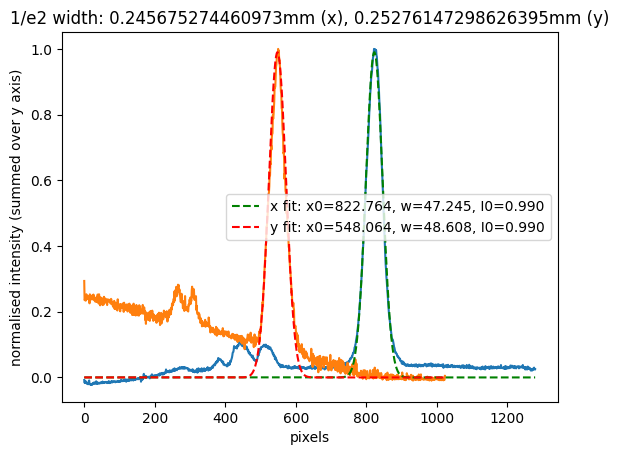

In [31]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

img = mpimg.imread(r"Z:\Beam Profiles with Camera\02-09_Input\image_3.png")

print('Image dimensions:', img.shape)


intensity_x = img[:,:,2].sum(axis=0)
pixel_x = np.arange(intensity_x.shape[0])
noise_x = np.average(intensity_x[0:300])
intensity_x = intensity_x-noise_x
intensity_x = intensity_x/np.max(intensity_x)

plt.plot(pixel_x,intensity_x)

intensity_y = img[:,:,2].sum(axis=1)
pixel_y = np.arange(intensity_y.shape[0])
noise_y = np.average(intensity_y[800:1000])
intensity_y = intensity_y-noise_y
intensity_y = intensity_y/np.max(intensity_y)

plt.plot(pixel_y,intensity_y)

def Gaussian(x,x0,w,I0):
    return I0*np.exp( -2*((x-x0)**2)/(w**2) )

popt_x, pcov_x = curve_fit(Gaussian, pixel_x, intensity_x, bounds=([700,0,0.99],[900,100,1]))
popt_y, pcov_y = curve_fit(Gaussian, pixel_y, intensity_y, bounds=([400,0,0.99],[700,100,1]))

plt.plot(pixel_x, Gaussian(pixel_x, *popt_x), 'g--',
         label='x fit: x0=%5.3f, w=%5.3f, I0=%5.3f' % tuple(popt_x))
plt.plot(pixel_y, Gaussian(pixel_y, *popt_y), 'r--',
         label='y fit: x0=%5.3f, w=%5.3f, I0=%5.3f' % tuple(popt_y))
plt.legend()
plt.xlabel('pixels')
plt.ylabel('normalised intensity (summed over y axis)')
pixel_length = 5.2e-3 # mm
pixel_length = 5.2e-3 # mm
w_e2_x = pixel_length*popt_x[1]
w_e2_y = pixel_length*popt_y[1]
plt.title('1/e2 width: {}mm (x), {}mm (y)'.format(w_e2_x, w_e2_y))
plt.show



##### Fiber output

Image dimensions: (1024, 1280, 4)


<function matplotlib.pyplot.show(close=None, block=None)>

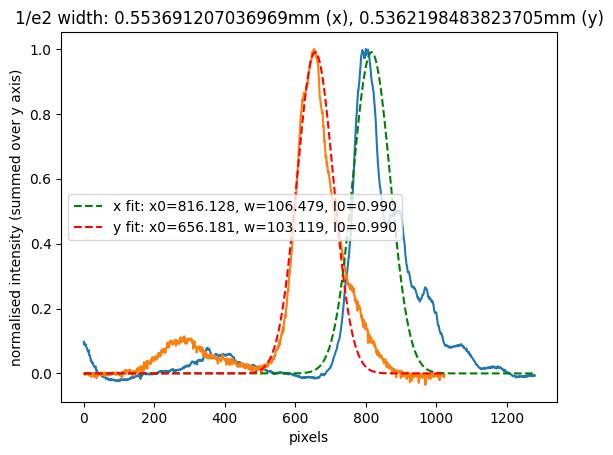

In [29]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

img = mpimg.imread(r"Z:\Beam Profiles with Camera\09-09 Divergence Measurements\fiber output 09-09_0.png")

print('Image dimensions:', img.shape)


intensity_x = img[:,:,2].sum(axis=0)
pixel_x = np.arange(intensity_x.shape[0])
noise_x = np.average(intensity_x[100:300])
intensity_x = intensity_x-noise_x
intensity_x = intensity_x/np.max(intensity_x)

plt.plot(pixel_x,intensity_x)

intensity_y = img[:,:,2].sum(axis=1)
pixel_y = np.arange(intensity_y.shape[0])
noise_y = np.average(intensity_y[0:150])
intensity_y = intensity_y-noise_y
intensity_y = intensity_y/np.max(intensity_y)

plt.plot(pixel_y,intensity_y)

def Gaussian(x,x0,w,I0):
    return I0*np.exp( -2*((x-x0)**2)/(w**2) )

popt_x, pcov_x = curve_fit(Gaussian, pixel_x, intensity_x, bounds=([700,0,0.99],[1000,200,1]))
popt_y, pcov_y = curve_fit(Gaussian, pixel_y, intensity_y, bounds=([600,0,0.99],[700,200,1]))

plt.plot(pixel_x, Gaussian(pixel_x, *popt_x), 'g--',
         label='x fit: x0=%5.3f, w=%5.3f, I0=%5.3f' % tuple(popt_x))
plt.plot(pixel_y, Gaussian(pixel_y, *popt_y), 'r--',
         label='y fit: x0=%5.3f, w=%5.3f, I0=%5.3f' % tuple(popt_y))
plt.legend()
plt.xlabel('pixels')
plt.ylabel('normalised intensity (summed over y axis)')
pixel_length = 5.2e-3 # mm
pixel_length = 5.2e-3 # mm
w_e2_x = pixel_length*popt_x[1]
w_e2_y = pixel_length*popt_y[1]
plt.title('1/e2 width: {}mm (x), {}mm (y)'.format(w_e2_x, w_e2_y))
plt.show



##### AOM 2 Input

Image dimensions: (640, 628, 4)


<function matplotlib.pyplot.show(close=None, block=None)>

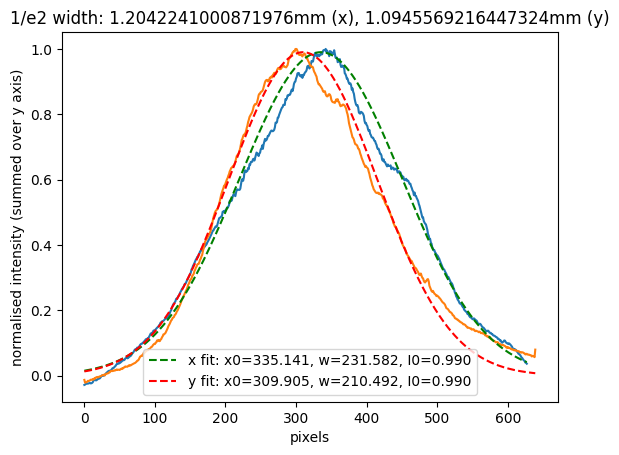

In [42]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

img = mpimg.imread(r"Z:\Beam Profiles with Camera\09-09 Divergence Measurements\f2nd AOM input 09-09_0.png")

print('Image dimensions:', img.shape)


intensity_x = img[:,:,2].sum(axis=0)
pixel_x = np.arange(intensity_x.shape[0])
noise_x = np.average(intensity_x[0:50])
intensity_x = intensity_x-noise_x
intensity_x = intensity_x/np.max(intensity_x)

plt.plot(pixel_x,intensity_x)

intensity_y = img[:,:,2].sum(axis=1)
pixel_y = np.arange(intensity_y.shape[0])
noise_y = np.average(intensity_y[0:50])
intensity_y = intensity_y-noise_y
intensity_y = intensity_y/np.max(intensity_y)

plt.plot(pixel_y,intensity_y)

def Gaussian(x,x0,w,I0):
    return I0*np.exp( -2*((x-x0)**2)/(w**2) )

popt_x, pcov_x = curve_fit(Gaussian, pixel_x, intensity_x, bounds=([np.argmax(intensity_x)-75,0,0.99],[np.argmax(intensity_x)+75,np.max(pixel_x),1.1]))
popt_y, pcov_y = curve_fit(Gaussian, pixel_y, intensity_y, bounds=([np.argmax(intensity_y)-75,0,0.99],[np.argmax(intensity_y)+75,np.max(pixel_y),1.1]))

plt.plot(pixel_x, Gaussian(pixel_x, *popt_x), 'g--',
         label='x fit: x0=%5.3f, w=%5.3f, I0=%5.3f' % tuple(popt_x))
plt.plot(pixel_y, Gaussian(pixel_y, *popt_y), 'r--',
         label='y fit: x0=%5.3f, w=%5.3f, I0=%5.3f' % tuple(popt_y))
plt.legend()
plt.xlabel('pixels')
plt.ylabel('normalised intensity (summed over y axis)')
pixel_length = 5.2e-3 # mm
pixel_length = 5.2e-3 # mm
w_e2_x = pixel_length*popt_x[1]
w_e2_y = pixel_length*popt_y[1]
plt.title('1/e2 width: {}mm (x), {}mm (y)'.format(w_e2_x, w_e2_y))
plt.show



#### Make into Function

In [52]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def Gaussian(x,x0,w,I0):
    return I0*np.exp( -2*((x-x0)**2)/(w**2) )

def FitGaussian(filepath): # must be r"..." to read properly
    img = mpimg.imread(filepath)

    print('Image dimensions:', img.shape)


    intensity_x = img[:,:,2].sum(axis=0)
    pixel_x = np.arange(intensity_x.shape[0])
    noise_x = np.average(intensity_x[0:50])
    intensity_x = intensity_x-noise_x
    intensity_x = intensity_x/np.max(intensity_x)

    plt.plot(pixel_x,intensity_x)

    intensity_y = img[:,:,2].sum(axis=1)
    pixel_y = np.arange(intensity_y.shape[0])
    noise_y = np.average(intensity_y[0:50])
    intensity_y = intensity_y-noise_y
    intensity_y = intensity_y/np.max(intensity_y)

    plt.plot(pixel_y,intensity_y)

    popt_x, pcov_x = curve_fit(Gaussian, pixel_x, intensity_x, bounds=([np.argmax(intensity_x)-75,0,0.99],[np.argmax(intensity_x)+75,np.max(pixel_x),1.1]))
    popt_y, pcov_y = curve_fit(Gaussian, pixel_y, intensity_y, bounds=([np.argmax(intensity_y)-75,0,0.99],[np.argmax(intensity_y)+75,np.max(pixel_y),1.1]))

    plt.plot(pixel_x, Gaussian(pixel_x, *popt_x), 'g--',
            label='x fit: x0=%5.3f, w=%5.3f, I0=%5.3f' % tuple(popt_x))
    plt.plot(pixel_y, Gaussian(pixel_y, *popt_y), 'r--',
            label='y fit: x0=%5.3f, w=%5.3f, I0=%5.3f' % tuple(popt_y))
    plt.legend()
    plt.xlabel('pixels')
    plt.ylabel('normalised intensity (summed over y axis)')
    pixel_length = 5.2e-3 # mm
    pixel_length = 5.2e-3 # mm
    w_e2_x = pixel_length*popt_x[1]
    w_e2_y = pixel_length*popt_y[1]
    plt.title('1/e2 width: {}mm (x), {}mm (y)'.format(w_e2_x, w_e2_y))
    plt.show()

    return w_e2_x, w_e2_y


Z:\Beam Profiles with Camera\09-09 Divergence Measurements\Fiber Output\fiber output 09-09_0.png
Image dimensions: (1024, 1280, 4)


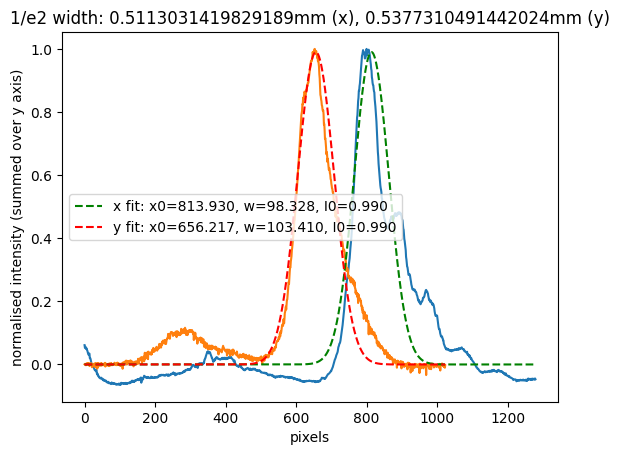

Z:\Beam Profiles with Camera\09-09 Divergence Measurements\Fiber Output\fiber output 09-09_1.png
Image dimensions: (1024, 1280, 4)


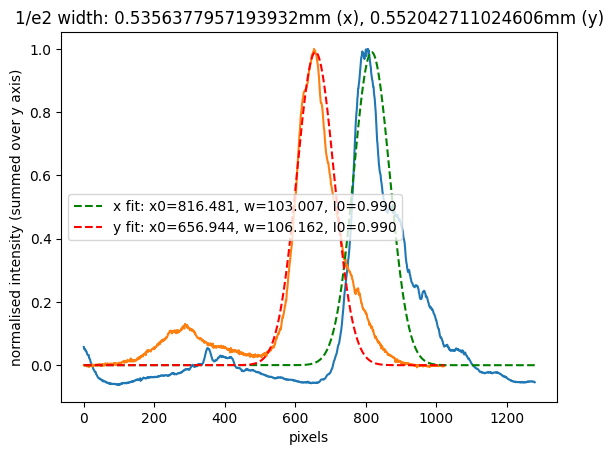

Z:\Beam Profiles with Camera\09-09 Divergence Measurements\Fiber Output\fiber output 09-09_2.png
Image dimensions: (1024, 1280, 4)


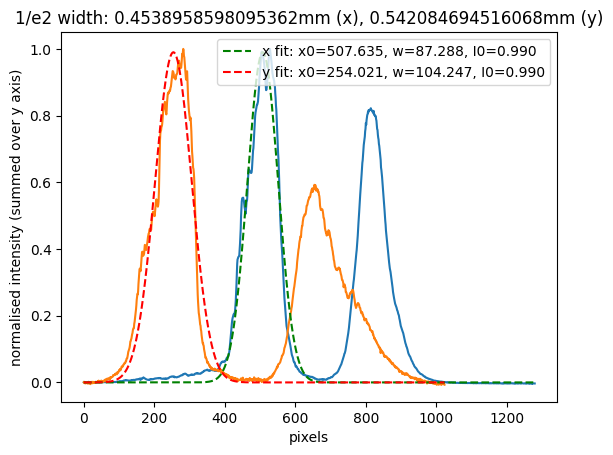

Z:\Beam Profiles with Camera\09-09 Divergence Measurements\2nd AOM input\f2nd AOM input 09-09_0.png
Image dimensions: (640, 628, 4)


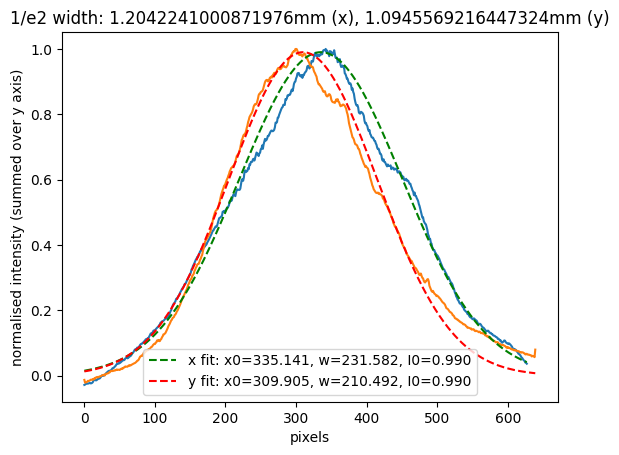

Z:\Beam Profiles with Camera\09-09 Divergence Measurements\2nd AOM input\f2nd AOM input 09-09_1.png
Image dimensions: (640, 628, 4)


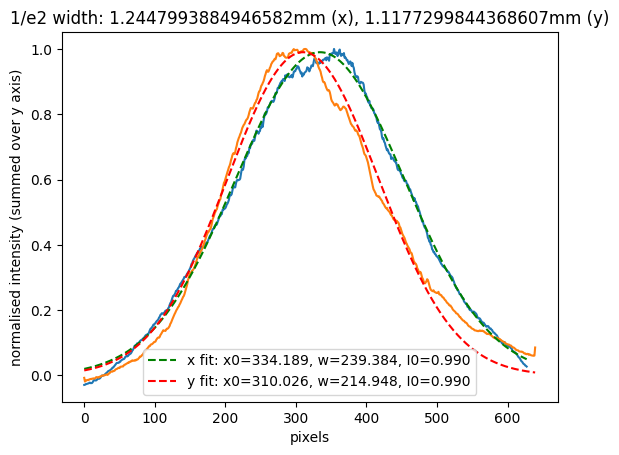

Z:\Beam Profiles with Camera\09-09 Divergence Measurements\2nd AOM input\f2nd AOM input 09-09_2.png
Image dimensions: (640, 628, 4)


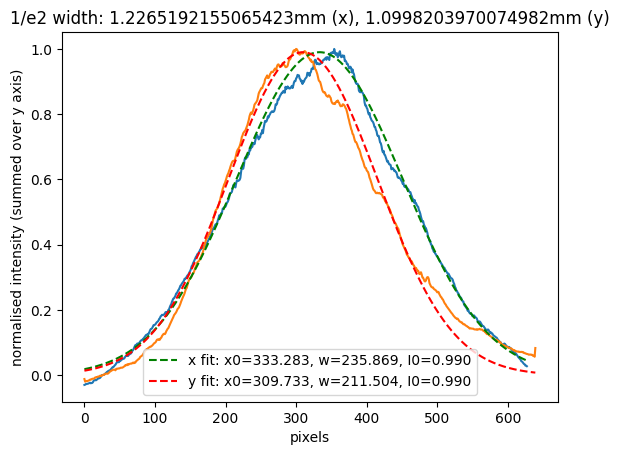

Z:\Beam Profiles with Camera\09-09 Divergence Measurements\2nd AOM input\f2nd AOM input 09-09_3.png
Image dimensions: (640, 628, 4)


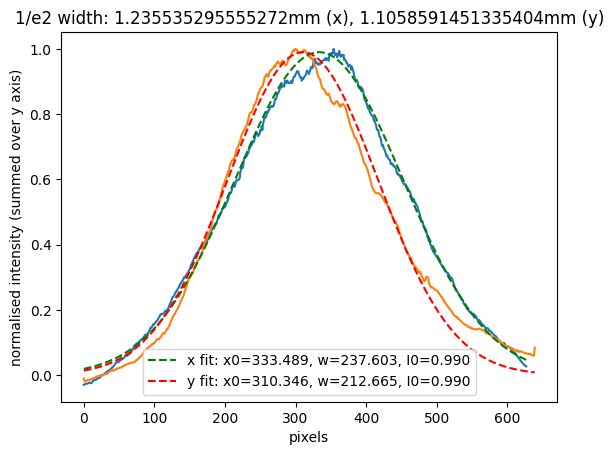

[0.51130314 0.5356378  0.45389586]
[0.53773105 0.55204271 0.54208469]
[1.2042241  1.24479939 1.22651922 1.2355353 ]
[1.09455692 1.11772998 1.0998204  1.10585915]
avg output: 0.5002789325039494mm (x) 0.5439528182282921mm (y)
avg before 2nd AOM: 1.2277694999109177mm (x) 1.104491612055658mm (y)


In [57]:
import os
directory_output = r"Z:\Beam Profiles with Camera\09-09 Divergence Measurements\Fiber Output"
directory_AOM = r"Z:\Beam Profiles with Camera\09-09 Divergence Measurements\2nd AOM input"

output_x = []
output_y = []
AOM_x = []
AOM_y = []

for filename in os.listdir(directory_output):
    f = os.path.join(directory_output, filename)
    
    if os.path.isfile(f):
        print(f)
        wx, wy = FitGaussian(f)
        output_x.append(wx)
        output_y.append(wy)

    else:
        print('not a file')


for filename in os.listdir(directory_AOM):
    f = os.path.join(directory_AOM, filename)
    
    if os.path.isfile(f):
        print(f)
        wx, wy = FitGaussian(f)
        AOM_x.append(wx)
        AOM_y.append(wy)

    else:
        print('not a file')


output_x = np.array(output_x)
output_y = np.array(output_y)
AOM_x = np.array(AOM_x)
AOM_y = np.array(AOM_y)
print(output_x)
print(output_y)
print(AOM_x)
print(AOM_y)

avg_ix = np.mean(output_x)
avg_iy = np.mean(output_y)
avg_aomx = np.mean(AOM_x)
avg_aomy = np.mean(AOM_y)

print('avg output: {}mm (x) {}mm (y)'.format(avg_ix, avg_iy))
print('avg before 2nd AOM: {}mm (x) {}mm (y)'.format(avg_aomx, avg_aomy))


Image dimensions: (1024, 1280, 4)


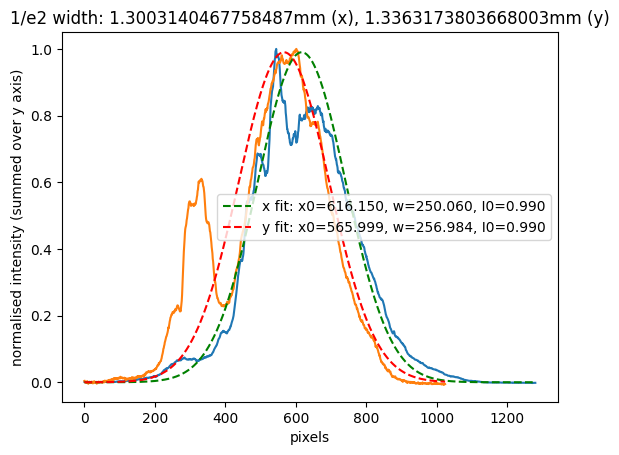

Image dimensions: (1024, 1280, 4)


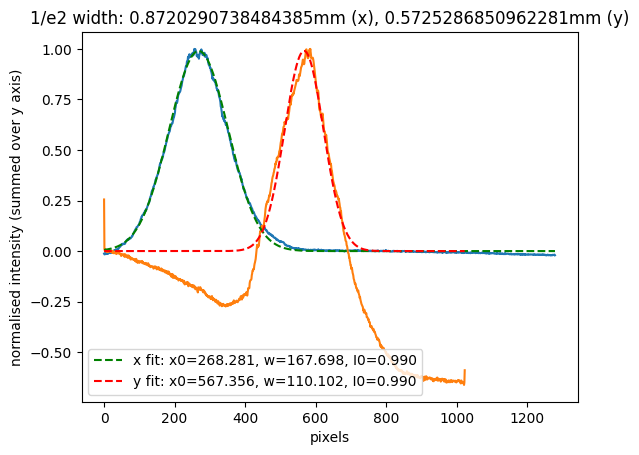

(np.float64(0.8720290738484385), np.float64(0.5725286850962281))

In [58]:
FitGaussian(r"Z:\Beam Profiles with Camera\Fiber Input\10-09\input 10-09_0.png")
FitGaussian(r"Z:\Beam Profiles with Camera\Fiber Input\10-09\input 10-09_1.png")

Image dimensions: (1024, 1280, 4)


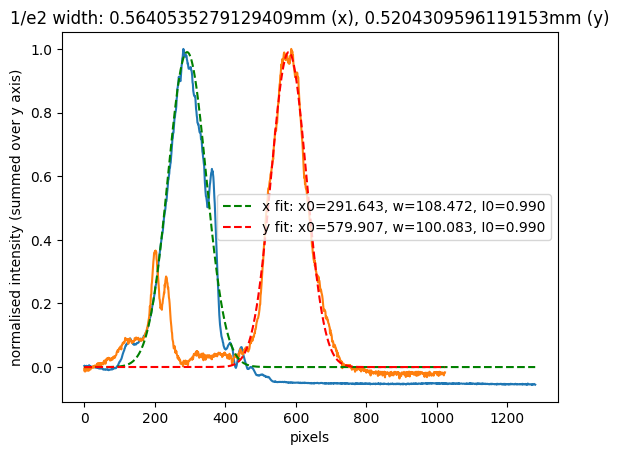

(np.float64(0.5640535279129409), np.float64(0.5204309596119153))

In [59]:
FitGaussian(r"Z:\Beam Profiles with Camera\Fiber Input\10-09\input_shrunk_10-09_0.png")

Image dimensions: (1024, 1280, 4)


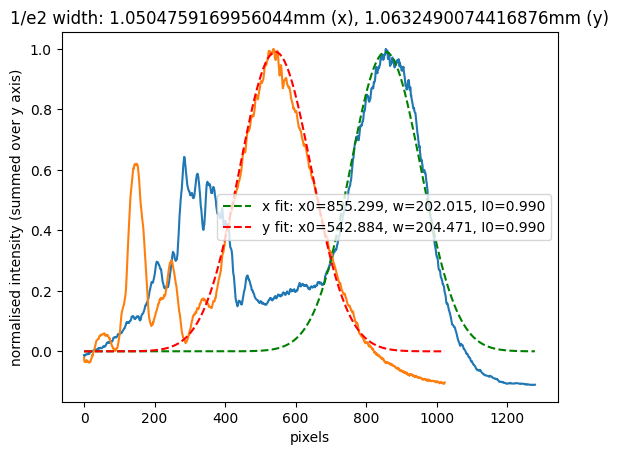

(np.float64(1.0504759169956044), np.float64(1.0632490074416876))

In [60]:
FitGaussian(r"Z:\Beam Profiles with Camera\Fiber Input\10-09\input_shrunk_10-09_1.png")